### Ventilated Thermocline: The Shadow Zone and Western Pool

Consider the ventilated thermocline model of the wind-driven ocean circulation that captured the vertical structure of the interior gyre circulation. 

Reconstruct the layer depths in all interior regions, including the shadow zone and the western pool. 

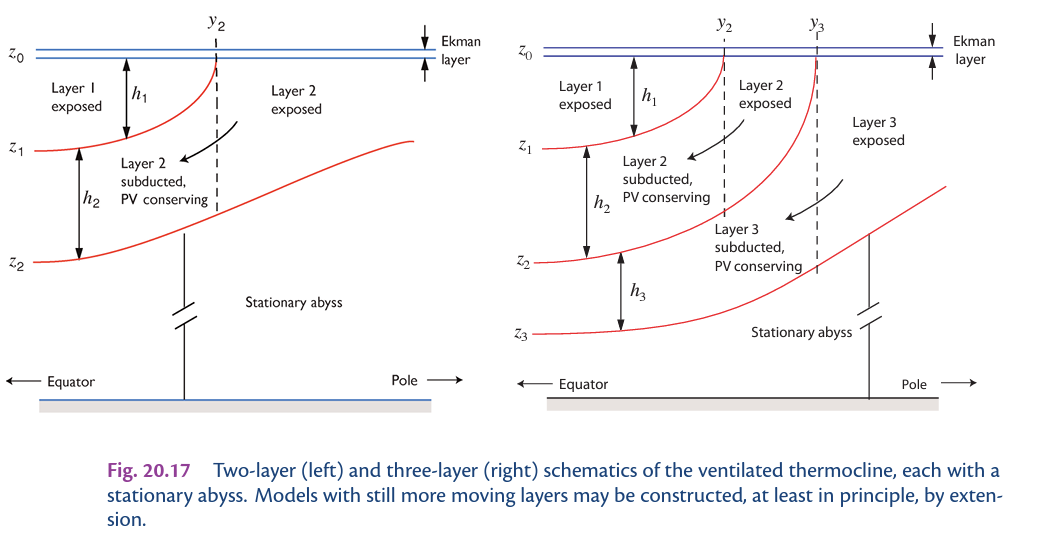

In [1213]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [1214]:
# numerical values for the problem parameters
del_rho2 = 2 #kg/m3
del_rho3 = 1 #kg/m3
rho1 = 1000 #kg/m3

H = 500 #m
M = 4000*1000 #m is the meridional extent of the gyre
y2 = 0.8*M
tau_0 = 0.1 #N/m2/p_0
beta = 1e-11
L = 1e7
g = 9.8 # gravity

f0 = 1e-4
f = f0 + beta*y
f_2 = f0 + beta*y2
x_E = L

In [1215]:
y_range = np.linspace(0,M, 1000)
x_range = np.linspace(0,L,1000)
x,y = np.meshgrid(x_range, y_range)

#### (a)
Write down the equations that we solve for both layers in regions $y>y_{2}$ and $y<y_{2}$, where y2 is the outcropping latitude of the first layer.

------------------- ANSWER

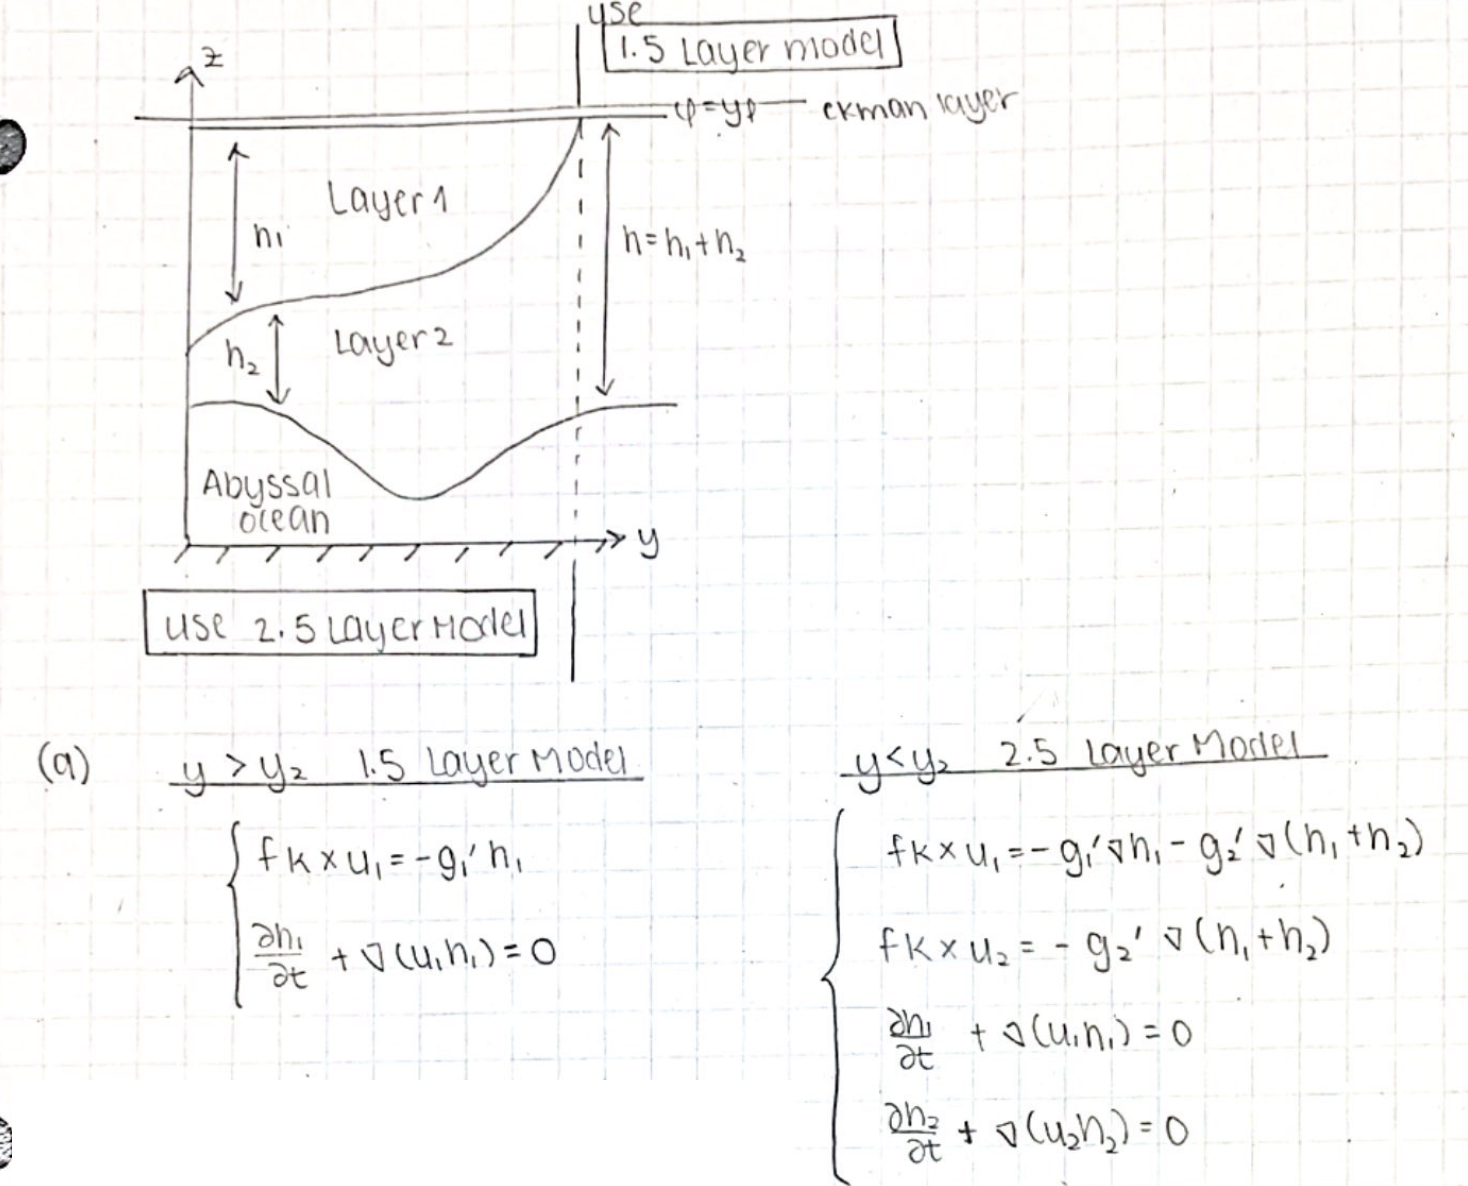

#### (b)
In which regions do we assume PV to be conserved for layers 1 and 2?

------------------- ANSWER

We assume that Potential Vorticity is conserved only for Layer 2 in the region under Layer 1 where it is not affected by wind, etc. The motion in layer 2 is shielded from wind forcing, and the effects of dissipation are assumed to be negligible. Thus, the fluid parcels in the layer will conserve their potential vorticity.

#### (c)
Plot the thicknesses $h$ and $h_{1}$

In [1367]:
tau = -tau_0*np.cos(np.pi*y/M)
g2_prime = g*(del_rho3/rho1)
g1_prime = g*(del_rho2/rho1)
# W_ek = (tau_0 * np.pi / (rho1*f0*M) )*np.sin(np.pi*y/M)
W_ek = np.sin(np.pi*y/M)*np.pi*tau_0 / (rho1*(f0+beta*y)*M)
# DO_squared = (2*f*f*tau_0*np.pi*np.sin(np.pi*y/M)*(x_E-x))/(g2_prime*beta*rho1*f0*M)
# DO_squared = (2*f*f*tau_0*np.pi*np.sin(np.pi*y/M)*(x_E-x))/(g2_prime*beta*rho1*f0*M)
DO_squared = 2*f*f*W_ek*(x_E - x)/(g2_prime*beta)
# DO_squared = -(2 * f**2 *W_ek *(x_E-x)) / g2_prime*beta
h_numer = (H**2 + DO_squared)
h_denom = 1 + (g1_prime/g2_prime)*(1-f/f_2)*(1-f/f_2)
h = np.sqrt(h_numer / h_denom)
h_1 = (1-f/f_2)*h

1220.4944538677805


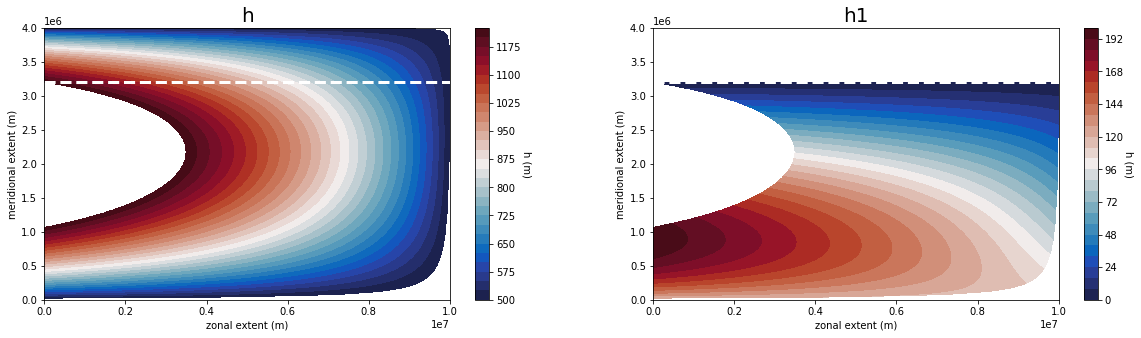

In [1259]:
plt.figure(figsize=(20,5))

# h[np.argwhere(y>y2)[0][0]:,:]=np.nan
h[h < 500]=np.nan # taking away the shadow zone
# h_1[h < 500]=np.nan # taking away the shadow zone
wb_value = h[800,0]
print(wb_value)
h[h > wb_value]= np.nan

h_1 = (1-f/f_2)*h
h_1[np.argwhere(y>y2)[0][0]:,:]=np.nan

plt.subplot(1, 2, 1)
plt.title('h', fontsize=20)
im = plt.contourf(x_range,y_range,h,levels=30,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.axhline(y=y2, c='white', linewidth=3, linestyle='dashed')

plt.subplot(1, 2, 2)
plt.title('h1', fontsize=20)
im = plt.contourf(x_range,y_range,h_1,levels=30,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.axhline(y=y2, c='white', linewidth=3, linestyle='dashed')
plt.show()

#### (d)
What is the shadow zone and the western pool? Are the solutions for $h$ and $h_{1}$ that you've plotted valid in those regions?

------------------- ANSWER

Within the ventilated thermocline, there are two regions - the shadow zone and the western pool - whose dynamics are not determined without additional assumptions. 
The shadow zone is in the ventilated thermocline. Consider that Layer 2 outcrops at $ y = y_2$. A column moving equatorward along the eastern boundary is subducted at $y_2$. This column does not remain against the eastern wall AND preserve its potential vorticity, so the column shrinks. No-normal flow is still satisfied, and this means that the layer depth if constant by geostrophy. So the column has to move westward, along the shadow'zone's boundary within which these is NO MOTION. 

The western pool is when polewards of the outcrop latitude where the layer 2 fluid feels the wind directly and the layer thickness if determined by Sverdrup balance. In the region east of the eqautorward of the outcrop latitude, there is a region where trajectories cannot be traced back to the outcrop. This is a 'pool' region in the west bounded by the trajectory emerging from the western boundary at the outcrop latitude. WITHIN THE POOL, TRAJECTORIES CANNOT BE TRACED BACK TO THE OUTCROP. Some assumptions for the western pool are: (1) all the water within it is ventilated, leading to a model of mode water, and (2)the potential vorticity within the pool is homogenized through the action of mesoscale eddies. The size of the pool increases as the poleward boundary of the pool region approaches the latitude of the outcrop and can extend almost across the entire gyre.  

The solution for $h$ and $h_{1}$ that I've plotted are NOT valid in those regions.

#### (e)
Find the solution for h and h1 in the shadow zone. Assume that the circulation in the shadow zone is stagnant in layer 2. Is the PV in layer 2 conserved in the shadow zone?

------------------- ANSWER

PV in the shadow zone is homogenized. Potential vroticity is everywhere given by f/h2, which varies spatially, but since there is no motion potential vorticity is still, rather trivially, conserved along trajectories.
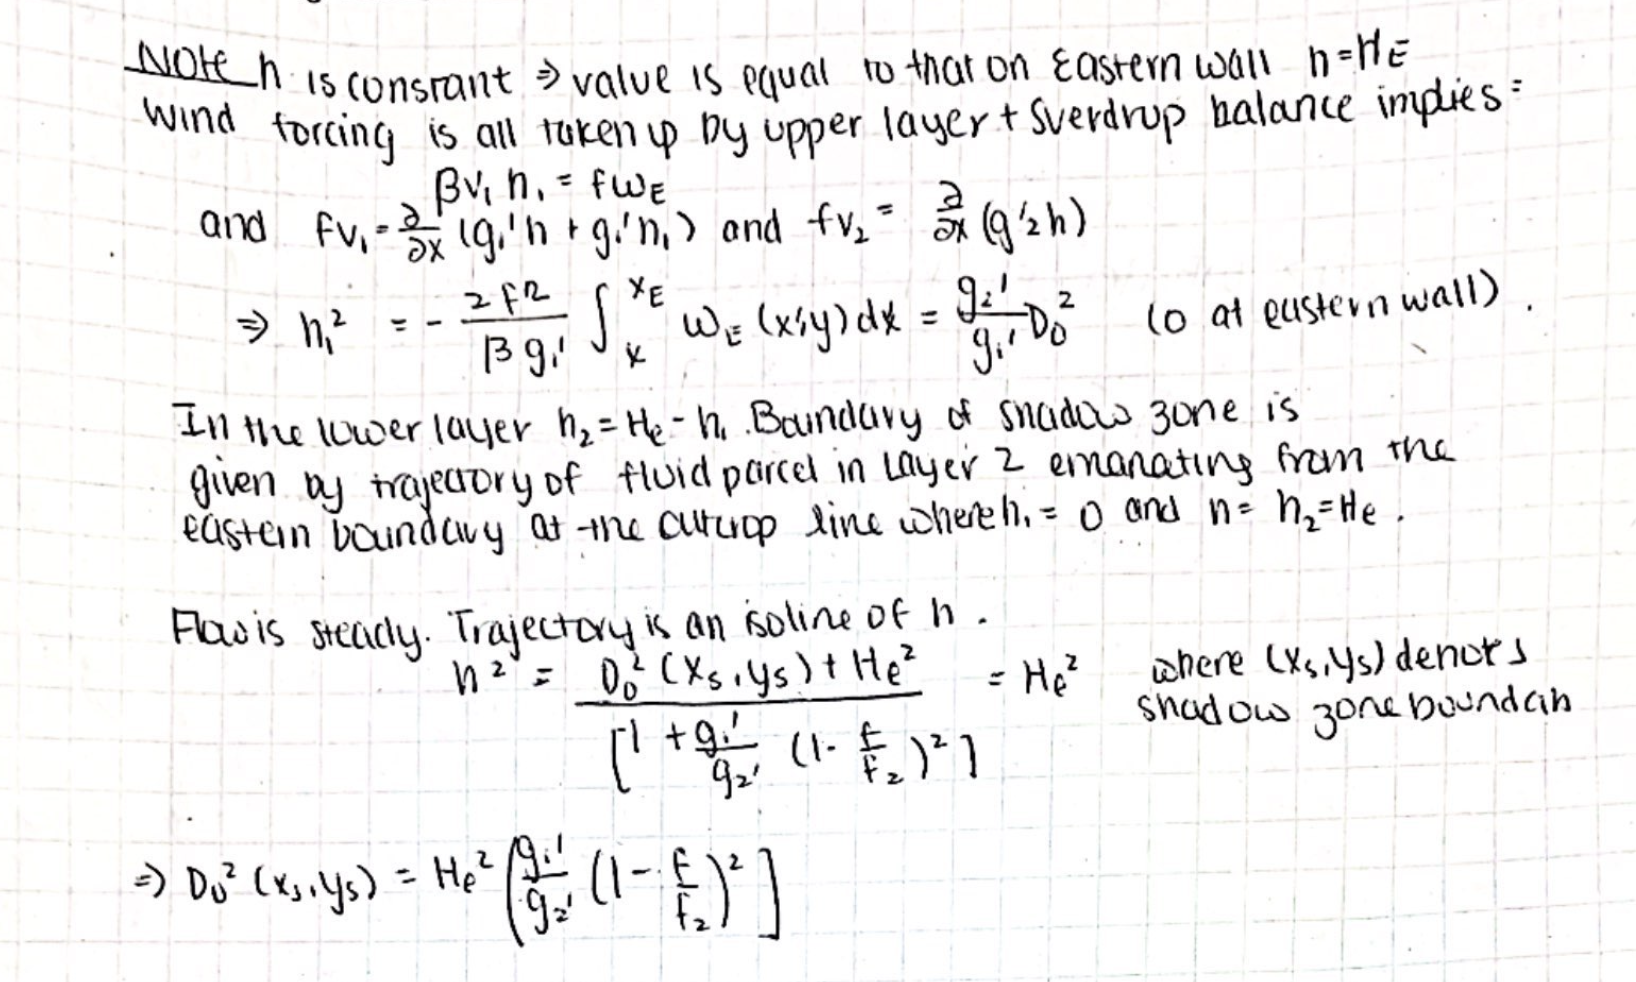

In [1264]:
g_div_12 = g1_prime/g2_prime
g_div_21 = g2_prime/g1_prime
f_div = f/f_2
D_0 = np.sqrt(H*H*(g_div_12*(1-f_div)*(1-f_div)))
h_1_shadowzone = np.sqrt((g_div_21)*DO_squared)
h_shadowzone = np.sqrt(((D_0*D_0) + (H*H))/(1 + g_div_12*(1-f_div)*(1-f_div)))

In [1269]:
tau = -tau_0*np.cos(np.pi*y/M)
g2_prime = g*(del_rho3/rho1)
g1_prime = g*(del_rho2/rho1)
# W_ek = (tau_0 * np.pi / (rho1*f0*M) )*np.sin(np.pi*y/M)
W_ek = np.sin(np.pi*y/M)*np.pi*tau_0 / (rho1*(f0+beta*y)*M)
# DO_squared = (2*f*f*tau_0*np.pi*np.sin(np.pi*y/M)*(x_E-x))/(g2_prime*beta*rho1*f0*M)
# DO_squared = (2*f*f*tau_0*np.pi*np.sin(np.pi*y/M)*(x_E-x))/(g2_prime*beta*rho1*f0*M)
DO_squared = 2*f*f*W_ek*(x_E - x)/(g2_prime*beta)
# DO_squared = -(2 * f**2 *W_ek *(x_E-x)) / g2_prime*beta
h_numer = (H**2 + DO_squared)
h_denom = 1 + (g1_prime/g2_prime)*(1-f/f_2)*(1-f/f_2)
h = np.sqrt(h_numer / h_denom)
h_1 = (1-f/f_2)*h
# from c

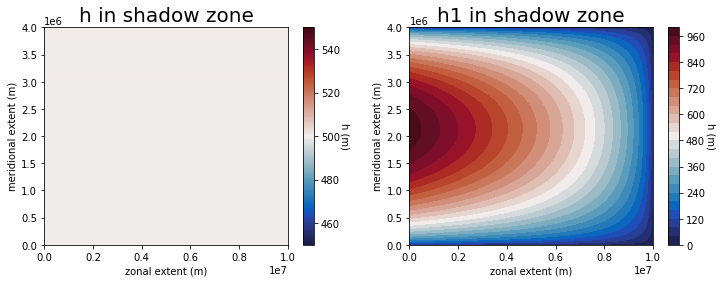

In [1270]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('h in shadow zone', fontsize=20)
im = plt.pcolormesh(x_range,y_range,h_shadowzone,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.subplot(1, 2, 2)
plt.title('h1 in shadow zone', fontsize=20)
im = plt.contourf(x_range,y_range,h_1_shadowzone,levels=30,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.show()

In [1271]:
tau = -tau_0*np.cos(np.pi*y/M)
g2_prime = g*(del_rho3/rho1)
g1_prime = g*(del_rho2/rho1)
W_ek = (tau_0 * np.pi / (rho1*f0*M) )*np.sin(np.pi*y/M)
DO_squared = (2*f*f*tau_0*np.pi*np.sin(np.pi*y/M)*(x_E-x))/(g2_prime*beta*rho1*f0*M)
# DO_squared = -(2 * f**2 *W_ek *(x_E-x)) / g2_prime*beta
h_numer = (H**2 + DO_squared)
h_denom = 1 + (g1_prime/g2_prime)*(1-f/f_2)*(1-f/f_2)
h = np.sqrt(h_numer / h_denom)
h_1 = (1-f/f_2)*h

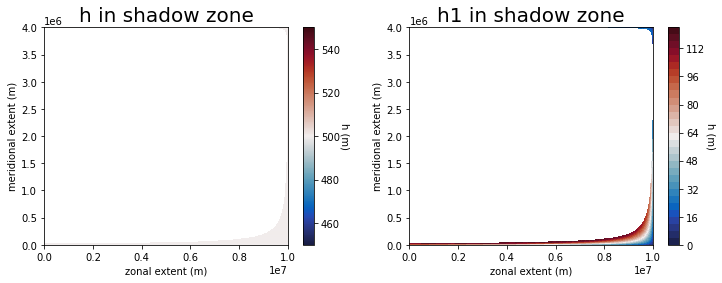

In [1272]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('h in shadow zone', fontsize=20)
im = plt.pcolormesh(x_range,y_range,np.where(h<500, h_shadowzone, np.nan),cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.subplot(1, 2, 2)
plt.title('h1 in shadow zone', fontsize=20)
im = plt.contourf(x_range,y_range,np.where(h<500, h_1_shadowzone, np.nan),levels=30,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.show()

#### (f)
Find the solution for h and h1 in the western pool zone. Assume that the PV in the western pool is homogenized due to strong mixing by mesoscale eddies and that this PV is the same as at a point that originates at the western boundary current at the outcropping location, i.e., $PV_{pool}(x,y) = PV(x=0, y=y_2)$.
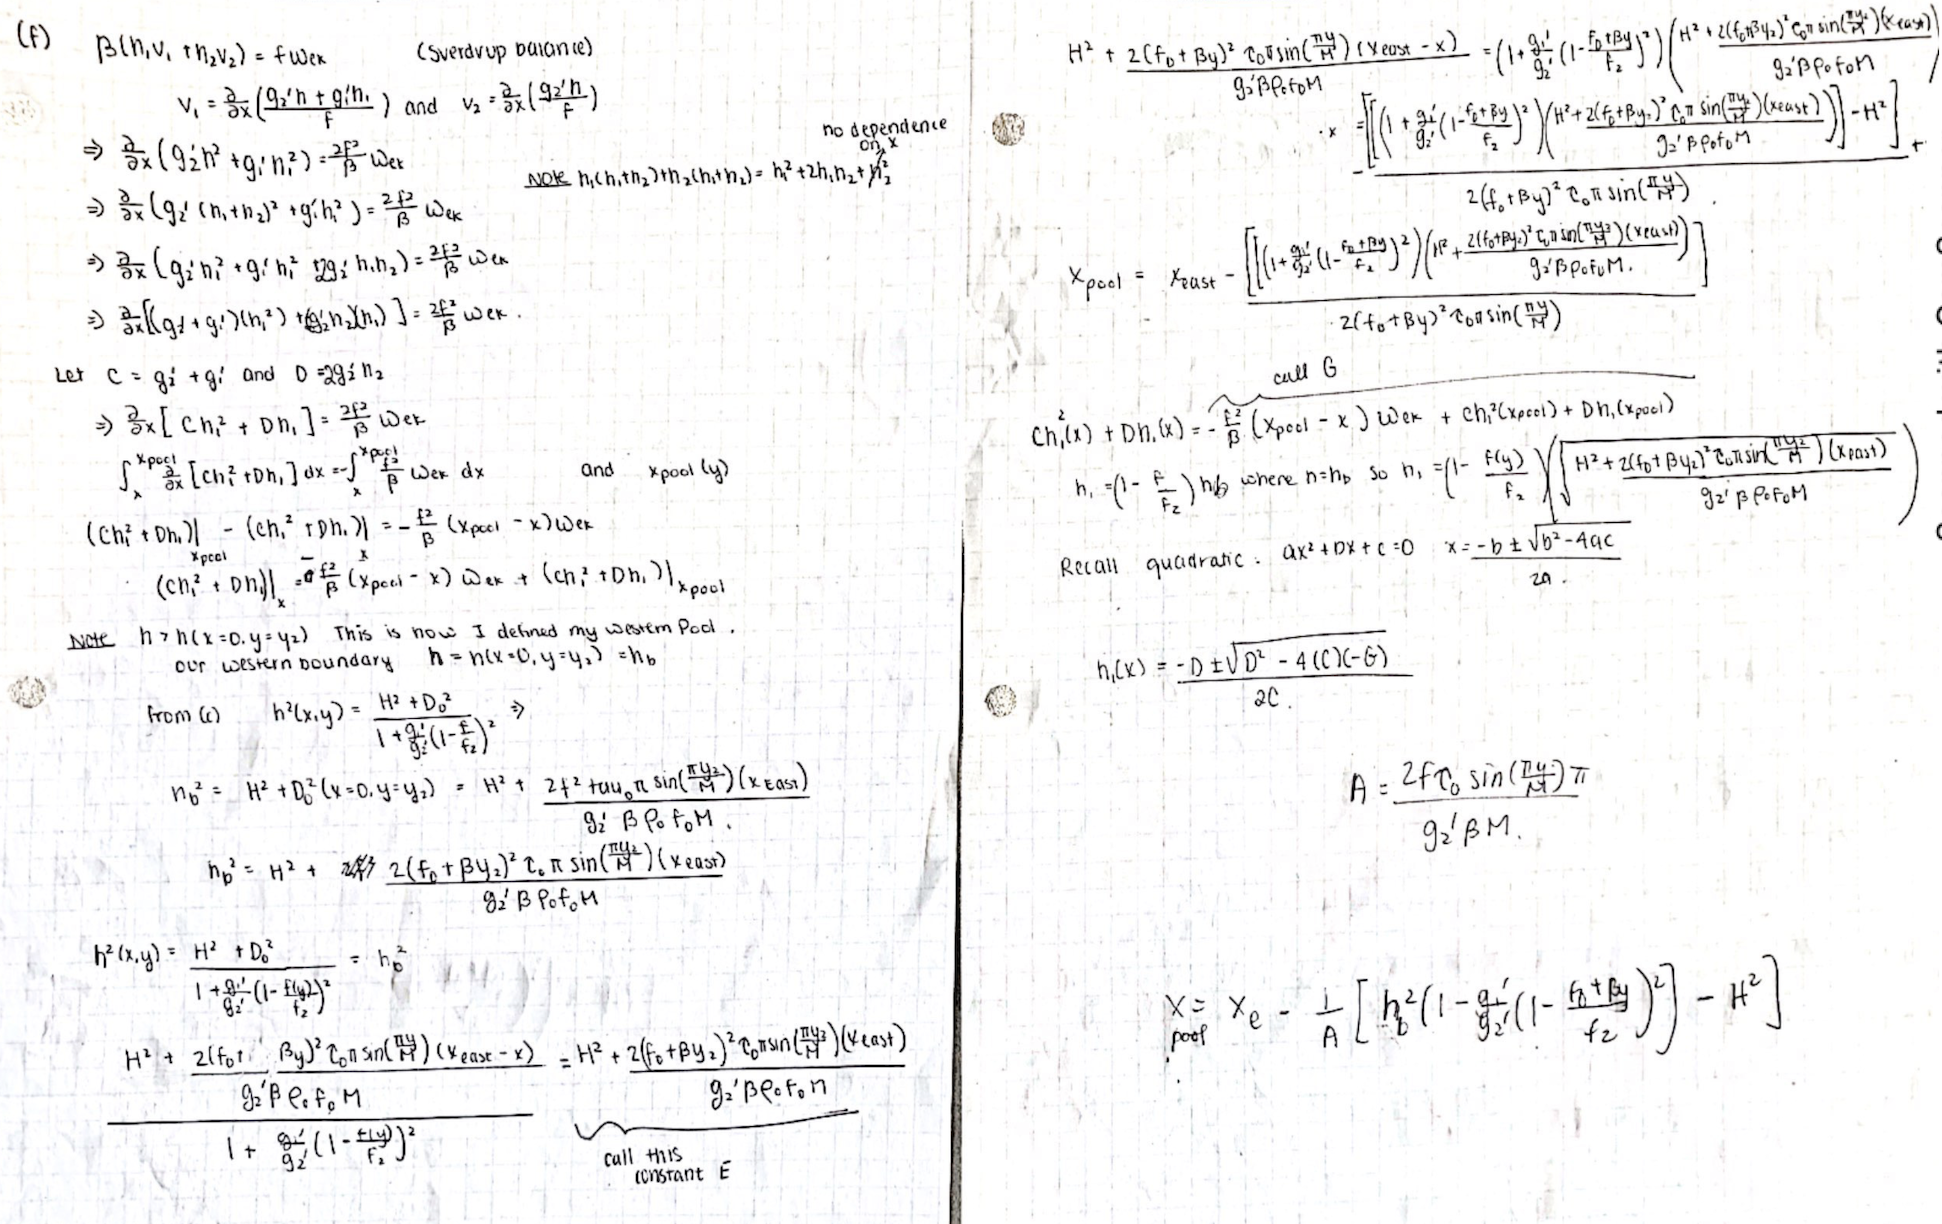

In [1280]:
# from (c)
tau = -tau_0*np.cos(np.pi*y/M)
g2_prime = g*(del_rho3/rho1)
g1_prime = g*(del_rho2/rho1)
W_ek = np.sin(np.pi*y/M)*np.pi*tau_0 / (rho1*(f0+beta*y)*M)
DO_squared = 2*f*f*W_ek*(x_E - x)/(g2_prime*beta)
# DO_squared = -(2 * f**2 *W_ek *(x_E-x)) / g2_prime*beta
h_numer = (H**2 + DO_squared)
h_denom = 1 + (g1_prime/g2_prime)*(1-f/f_2)*(1-f/f_2)
h = np.sqrt(h_numer / h_denom)
h_1 = (1-f/f_2)*h

In [1281]:
np.nanmean(h2)

1109.271229186274

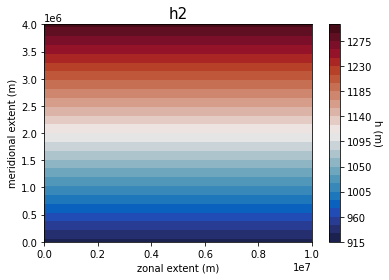

In [1282]:
q_pool = f[800,:]/h[800,0]
h2 = f/q_pool 
h2_val =h2[800,0]

plt.title('h2',fontsize=15)
im = plt.contourf(x_range, y_range, h2, levels=30, cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.show()

In [1283]:
const_C = g2_prime + g1_prime
const_D = 2*g2_prime*h2

In [1284]:
W_ek_y2 = np.sin(np.pi*y2/M)*np.pi*tau_0 / (rho1*(f0+beta*y2)*M)
DO_squared_x0_y2 = (2*(f0+beta*y2)*(f0+beta*y2)*W_ek_y2*x_E)/(g2_prime*beta)
h_bsquared = H**2 + DO_squared_x0_y2
h_b = np.sqrt(h_bsquared)

In [1291]:
W_ek = np.sin(np.pi*y/M)*np.pi*tau_0 / (rho1*(f0+beta*y)*M)
constant_A_ = g2_prime*beta/(-2*f*f*W_ek)
x_pool = x_E - ((1 + (g1_prime/g2_prime)*(1 - f/f_2)**2)*h_bsquared - H**2)*constant_A_

<ipython-input-1291-2a073989d822>:2: RuntimeWarning: divide by zero encountered in true_divide
  constant_A_ = g2_prime*beta/(-2*f*f*W_ek)


In [1292]:
h1_x_pool = (1-f/f_2)*h_b
constantG = -1*(const_C*h1_x_pool*h1_x_pool + const_D*h1_x_pool - 2*f*f*(x_pool - x)/beta)
h1_wp = (-const_D + np.sqrt(const_D*const_D + 4*const_C*constant_G))/(2*const_C)

In [1293]:
h_wp = h1_wp + h2

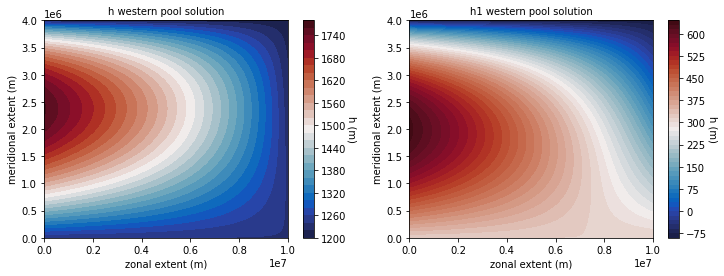

In [1294]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('h western pool solution', fontsize=10)
im = plt.contourf(x_range,y_range,h_wp,levels=30,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.subplot(1, 2, 2)
plt.title('h1 western pool solution', fontsize=10)
im = plt.contourf(x_range,y_range,h1_wp,levels=50,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.show()

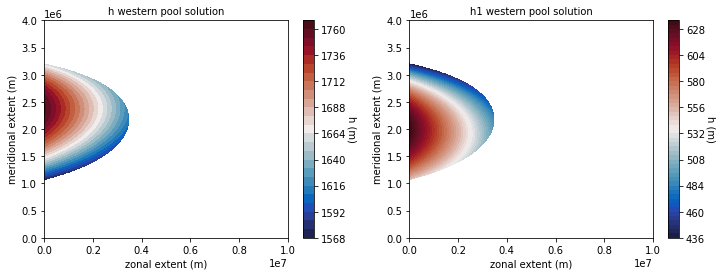

In [1302]:
h_only_wp = np.where(h > h_b, h_wp,np.nan)
h1_only_wp = np.where(h_only_wp > 0, h1_wp,np.nan)


plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('h western pool solution', fontsize=10)
im = plt.contourf(x_range,y_range,h_only_wp,levels=30,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.subplot(1, 2, 2)
plt.title('h1 western pool solution', fontsize=10)
im = plt.contourf(x_range,y_range,h1_only_wp,levels=50,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)

plt.show()

#### (g)
Combine your solutions for appropriate regions and plot the continuous distribution of h and h1 over the entire ocean interior.

In [1340]:
tau = -tau_0*np.cos(np.pi*y/M)
g2_prime = g*(del_rho3/rho1)
g1_prime = g*(del_rho2/rho1)
W_ek = (tau_0 * np.pi / (rho1*f0*M) )*np.sin(np.pi*y/M)
DO_squared = (2*f*f*tau_0*np.pi*np.sin(np.pi*y/M)*(x_E-x))/(g2_prime*beta*rho1*f0*M)
# DO_squared = -(2 * f**2 *W_ek *(x_E-x)) / g2_prime*beta
h_numer = (H**2 + DO_squared)
h_denom = 1 + (g1_prime/g2_prime)*(1-f/f_2)*(1-f/f_2)
h = np.sqrt(h_numer / h_denom)
h_1 = (1-f/f_2)*h

In [1356]:
h_sz = np.where(h<500, h_shadowzone, h)
h_sz_wp = np.where(h>h_b, h_wp, h_sz)

In [1381]:
h1_sz = np.where(h<500, h_1_shadowzone, h_1)
h1_sz_wp = np.where(h>h_b, h1_wp, h1_sz)
h1_sz_wp[np.argwhere(y>y2)[0][0]:,:]=np.nan


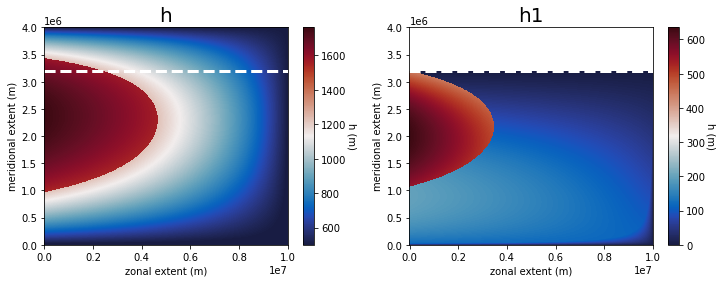

In [1382]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('h', fontsize=20)
im = plt.pcolormesh(x_range,y_range,h_sz_wp,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.axhline(y=y2, c='white', linewidth=3, linestyle='dashed')

plt.subplot(1, 2, 2)
plt.title('h1', fontsize=20)
im = plt.pcolormesh(x_range,y_range,h1_sz_wp,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.axhline(y=y2, c='white', linewidth=3, linestyle='dashed')
plt.show()

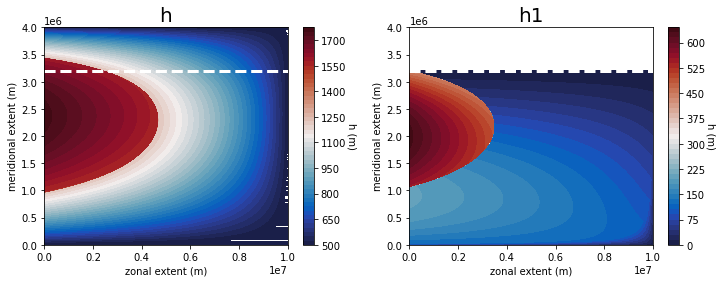

In [1384]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('h', fontsize=20)
im = plt.contourf(x_range,y_range,h_sz_wp,levels=50,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.axhline(y=y2, c='white', linewidth=3, linestyle='dashed')

plt.subplot(1, 2, 2)
plt.title('h1', fontsize=20)
im = plt.contourf(x_range,y_range,h1_sz_wp,levels=50,cmap=cmocean.cm.balance)
plt.ylabel('meridional extent (m)')
plt.xlabel('zonal extent (m)')
cbar = plt.colorbar(im)
cbar.set_label('h (m)',rotation=270, labelpad=10)
plt.axhline(y=y2, c='white', linewidth=3, linestyle='dashed')
plt.show()